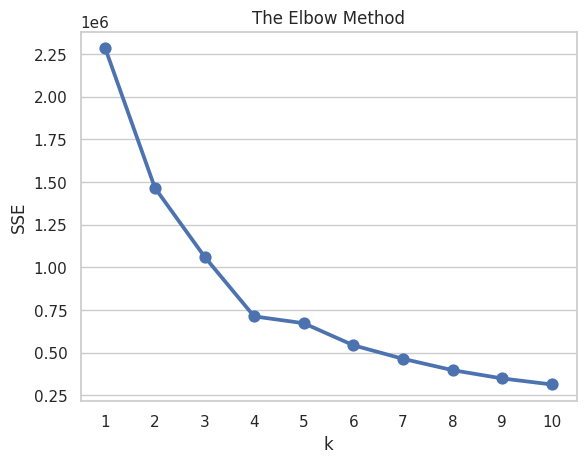

In [ ]:
#Elbow method
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

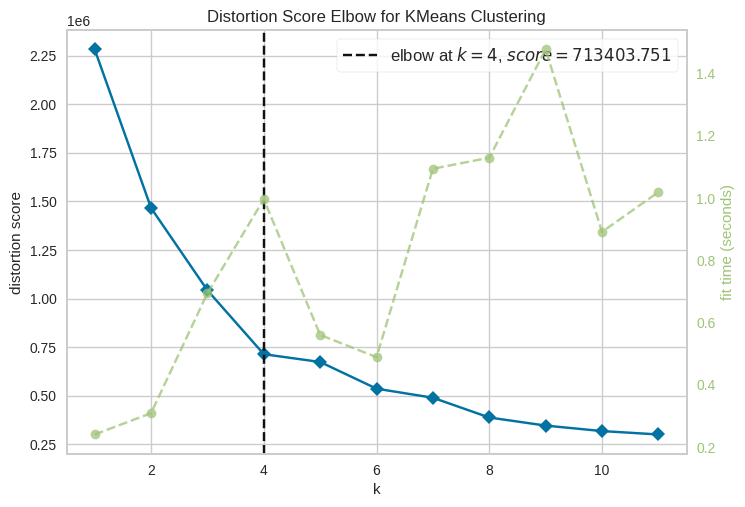

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#We also look at Yellowbrick method
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(customers_normalized)
visualizer.show()

,Recency,Frequency,MonetaryValue
Cluster,,,
0,249966,249966,249966
1,250903,250903,250903
2,105500,105500,105500
3,154455,154455,154455


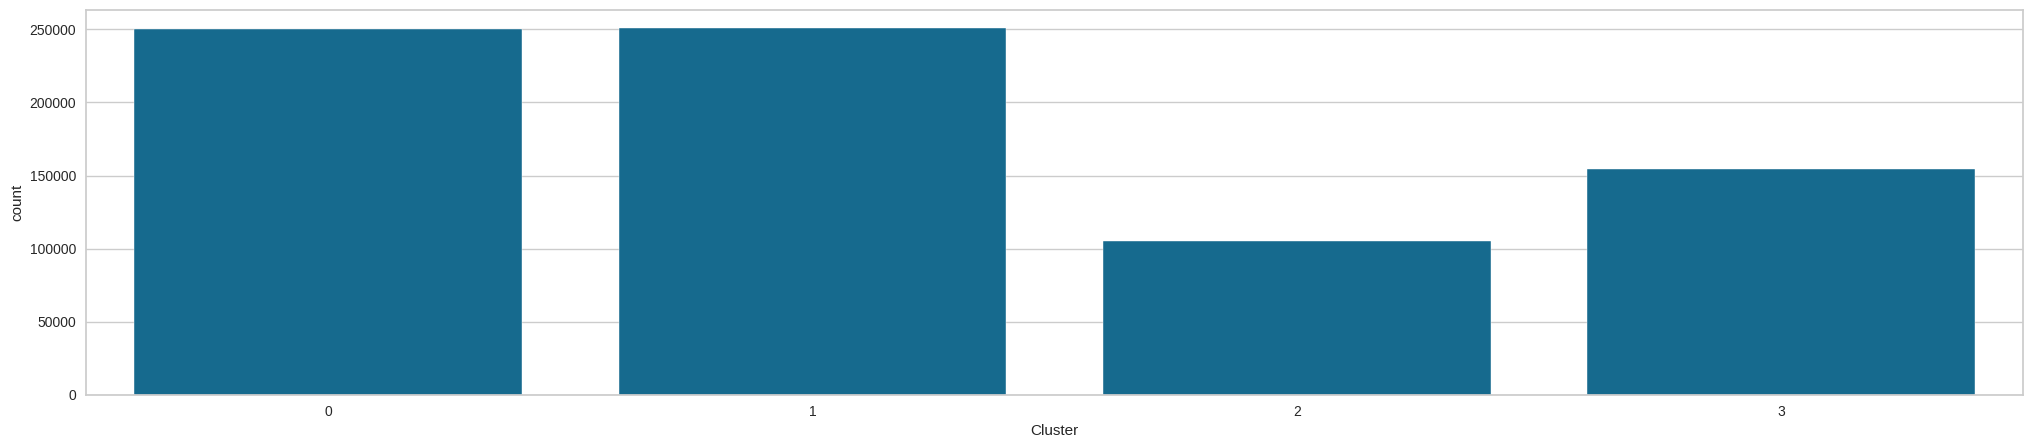

In [ ]:
#Applying KMeans with cluster =4
model = KMeans(n_clusters=4, random_state=42)
model.fit(customers_normalized)
model.labels_.shape
customers["Cluster"] = model.labels_
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="Cluster", data=customers)
customers.groupby(['Cluster']).count()

In [ ]:
#Loooking at descriptive staistics
customers["Cluster"] = model.labels_
customers.groupby('Cluster').agg({
    'Recency':['mean', 'std'],
    'Frequency':['mean', 'std'],
    'MonetaryValue':['mean','std', 'count']}).round(2)


Recency        Frequency       MonetaryValue                 
           mean    std      mean   std          mean      std   count
Cluster                                                              
0         97.73  39.26      1.00  0.00       2562.57  8761.54  249966
1         98.18  39.21      1.00  0.00        150.41   105.42  250903
2        147.69  68.01      2.12  0.36       2678.74  6790.90  105500
3        266.38  49.03      1.00  0.00       1013.69  2456.41  154455

#add the check for multiple customers

In [ ]:
customers

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
C1010011,93,2,5106.0,2
C1010012,118,1,1499.0,0
C1010014,155,2,1455.0,2
C1010018,86,1,30.0,1
C1010028,103,1,557.0,0
...,...,...,...,...
C9099836,155,1,691.0,0
C9099877,86,1,222.0,1
C9099919,114,1,126.0,1


# Part C Implementation

In [ ]:
df_merged = pd.merge(customers, Locations, on='CustomerID', how='left')

In [ ]:
summary = df_merged.groupby(['Cluster', 'CustLocation']).agg({
    'CustomerID': 'count',
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean'
}).reset_index().rename(columns={'CustomerID': 'CustomerCount'})

In [ ]:
top5_per_cluster = summary.sort_values(['Cluster', 'CustomerCount'], ascending=[True, False]) \
                          .groupby('Cluster').head(5).reset_index(drop=True)

In [ ]:
top5_per_cluster

# Part C Implementation Ended

<Axes: xlabel='Attribute', ylabel='Value'>

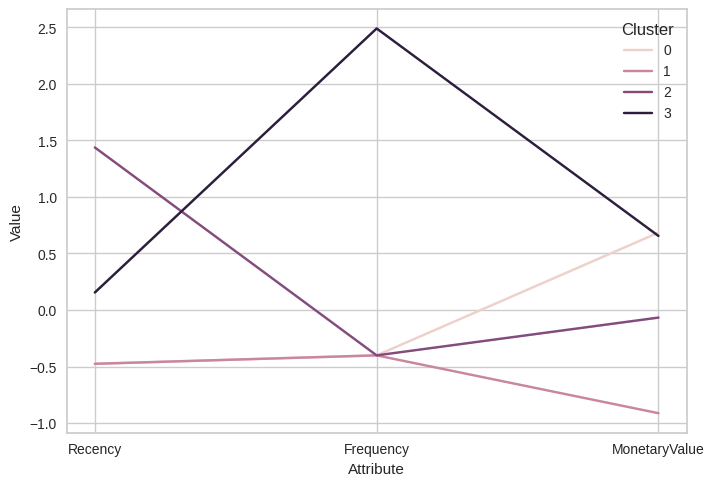

In [ ]:
# Create the dataframe
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = model.labels_
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()
# Visualize it
sns.lineplot(x = 'Attribute', y= 'Value', hue='Cluster', data=df_nor_melt)

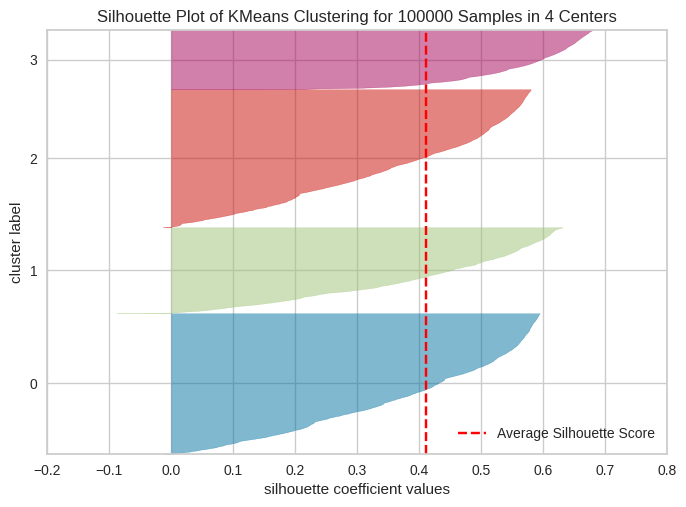

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
X = df_normalized[['Recency', 'Frequency', 'MonetaryValue']]
#X_sample = X.sample(n=100000, random_state=42)
model = KMeans(n_clusters=4, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()
plt.show()